In [1]:
%pylab inline
import os
import sys
sys.path.insert(0, os.getenv("HOME") + '/src/syntist')
from utils import ImagePlotter
from flyem_syn_eval import eval as flyem_eval

IP = ImagePlotter()

Populating the interactive namespace from numpy and matplotlib


('Raw: ', (511, 510, 2169))
('GT BM Presyn: ', (511, 510, 2169))
('Pred BM Presyn: ', (511, 510, 2169))


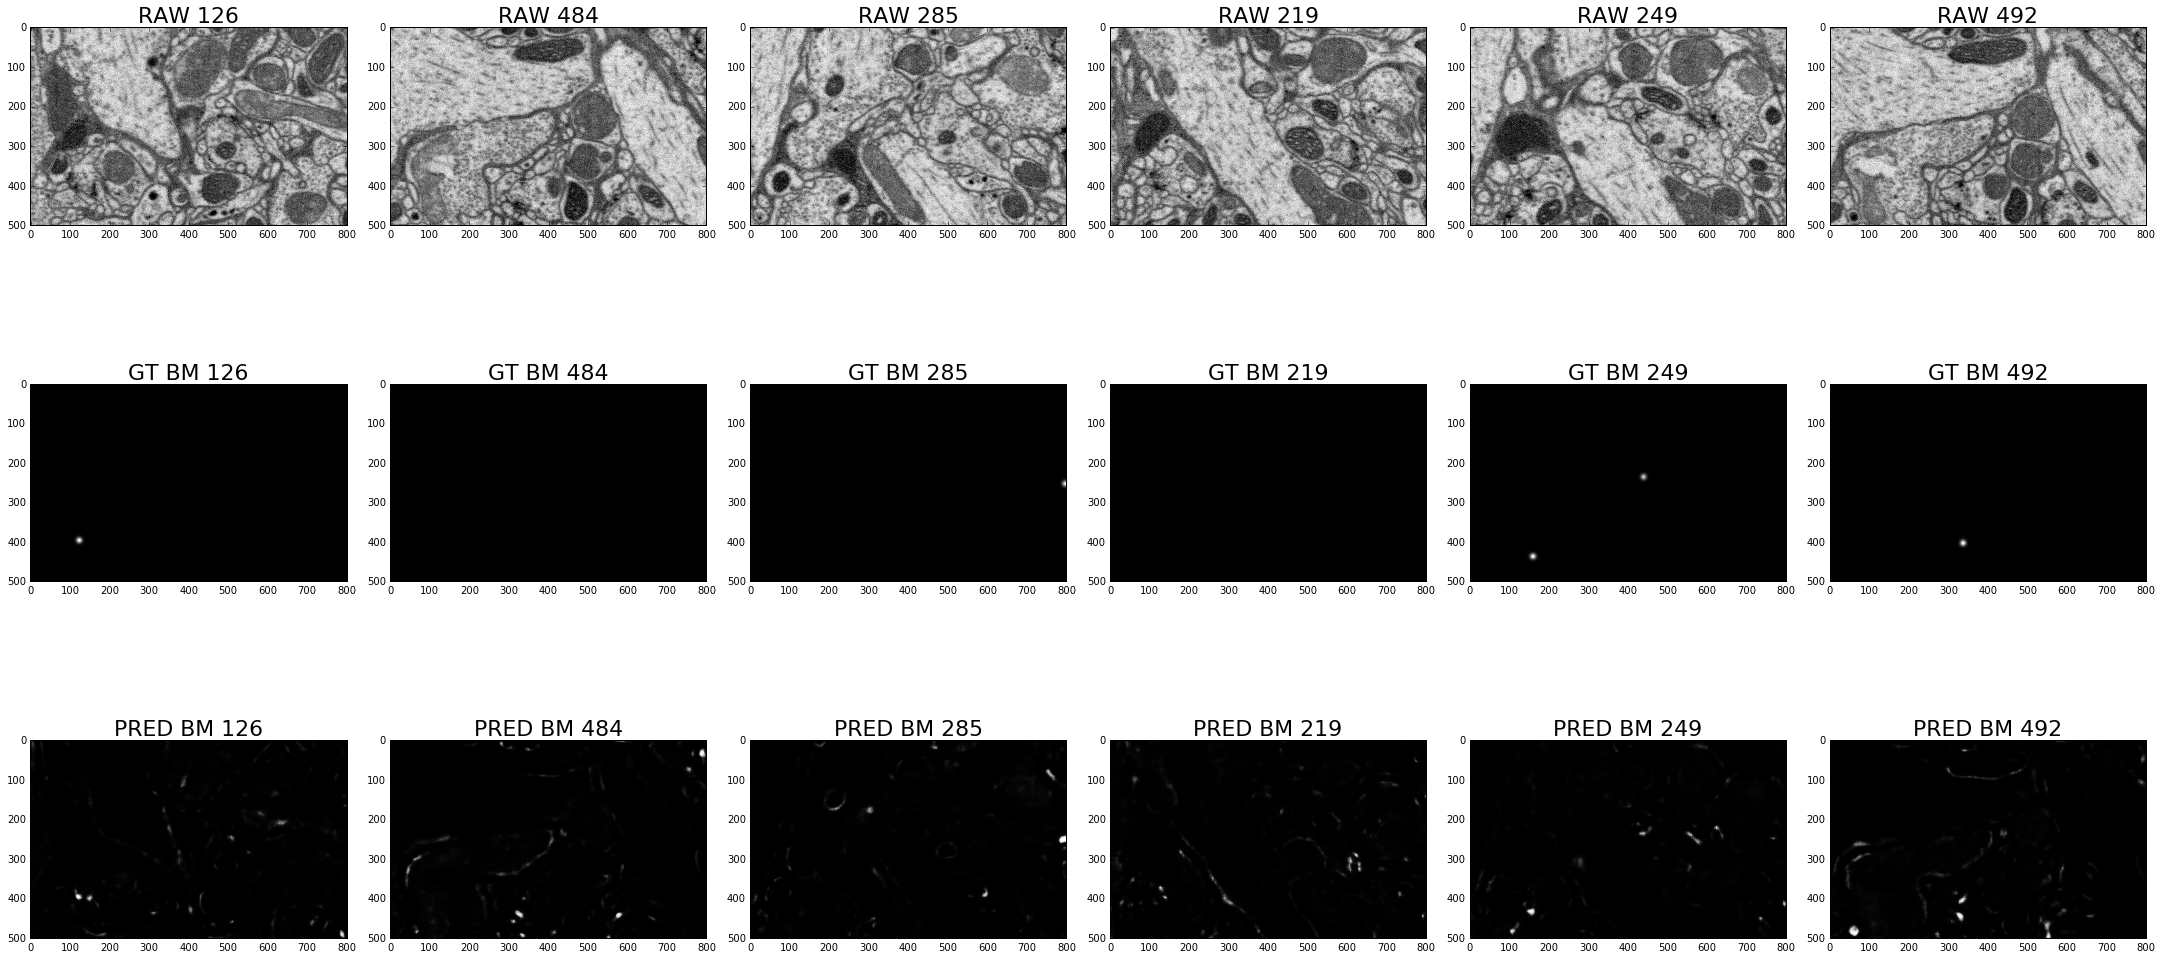

In [6]:
inputfilename = os.getenv("HOME") + '/projects/syntist/processing/20170625/085445/100000/CX_testing_inference100000_part0_full.hdf'
IP.visualize_pred_presyn_locations(inputfilename, shape=[500, 800], num_slices=6)

In [3]:
cx1_2_json_filename = os.path.join(os.getenv("HOME")+'/projects/syntist/processing', '20170625', '085445',
                             '100000','cx1_2_syn_locations_sigma2_minpeakdist10.json')
cx1_2_results_turagalab = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info(cx1_2_json_filename),
                                                 flyem_eval.cx_synapse_groundtruth('2'),
                                                 conf_thresholds=np.arange(0.0,0.98,0.02))

In [4]:
cx1_2_results_flyem = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info('fpl_unet_pred_cx1_2_baseline', 'emdata2:8000','cb7dc','roi_cx1_2'),
                                             flyem_eval.cx_synapse_groundtruth('2'),
                                             conf_thresholds=np.arange(0.7,0.98,0.02))

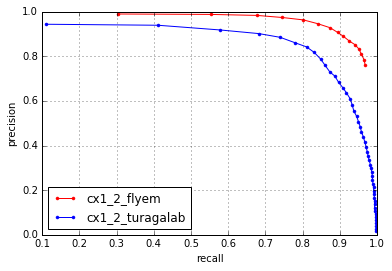

In [5]:
fig, ax = plt.subplots()
ax.plot(cx1_2_results_flyem.rr, cx1_2_results_flyem.pp, 'r.-', label='cx1_2_flyem')
ax.plot(cx1_2_results_turagalab.rr, cx1_2_results_turagalab.pp, 'b.-', label='cx1_2_turagalab')
legend = ax.legend(loc='lower left')
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.show()